In [102]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
#import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import analysis

In [104]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [105]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC')
import analysis

In [106]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/'

In [107]:
file_unbinned = glob.glob(d + 'full_unbinned_SSC*')

In [108]:
file_unbinned

['/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S3.pkl',
 '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S1.pkl',
 '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S2.pkl']

/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S3.pkl
(150, 8)
/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S1.pkl
(150, 8)
/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S2.pkl
(150, 8)


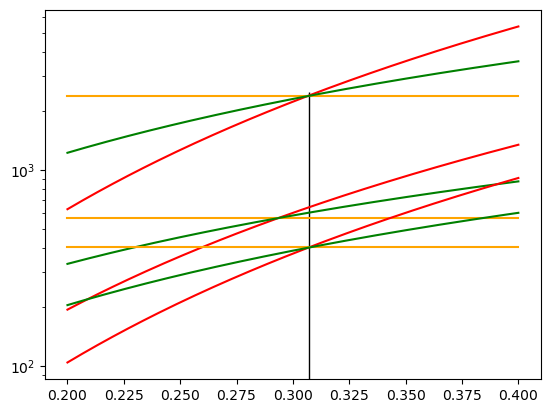

In [109]:
plt.vlines(0.30711, -3, 2500, zorder=0, color='k', lw=1, )
#ls = ['-','--',':','-.']
for i, f in enumerate(file_unbinned):
    print(f)
    Omunbinned, y = np.load(f, allow_pickle=True)
    print(np.array(y).shape)
    lnP = np.array([y[i][1] for i in range(len(Omunbinned))])
    lnPSSC = np.array([y[i][2] for i in range(len(Omunbinned))])
    Nth = np.array([y[i][3] for i in range(len(Omunbinned))])
    NNSbb_thth = np.array([y[i][4] for i in range(len(Omunbinned))])
    NNSbb_obsobs = np.array([y[i][5] for i in range(len(Omunbinned))])
    NNSbb_obsth = np.array([y[i][6] for i in range(len(Omunbinned))])
    NSb2_obs = np.array([y[i][7] for i in range(len(Omunbinned))])
    plt.plot(Omunbinned, NNSbb_thth, 'r', )#ls = ls[i])
    plt.plot(Omunbinned, NNSbb_obsobs, 'orange', )#ls = ls[i])
    plt.plot(Omunbinned, NNSbb_obsth, 'g',)# ls = ls[i])
    
    
    
#plt.plot(Omunbinned, (1 + 0.5*(NNSbb_thth - 2*NNSbb_obsth + NNSbb_obsobs)), ls = ls[i])
#    plt.plot(Omunbinned, (1 + 0.5*(NNSbb_thth**.5 - NNSbb_obsobs**.5)**2), ls = '-.')
#break
    #plt.plot(Omunbinned, NSb2_obs, 'k',ls = ls[i])
plt.yscale('log')
#plt.ylim(0, 1e3)
   # , NNSbb_thth, NNSbb_obsobs, NNSbb_obsth, NSb2_obs = np.array([y[i][2] for i in range(len(Omunbinned))]))
    #ssc_contOmunbinned = [y[i][2] for i in range(len(Omunbinned))]
    #sn_contOmunbinned = [y[i][1] for i in range(len(Omunbinned))]

/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S3.pkl
(150, 8)
/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S1.pkl
(150, 8)
/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC/full_unbinned_SSC_cat=703_sample_S2.pkl
(150, 8)


/tmp/ipykernel_182/1985669901.py:23: RuntimeWarning: invalid value encountered in log
  PSSC1 = np.log(1 + 0.5*(NNSbb_thth - 2*NNSbb_obsth + NNSbb_obsobs)-NSb2_obs)


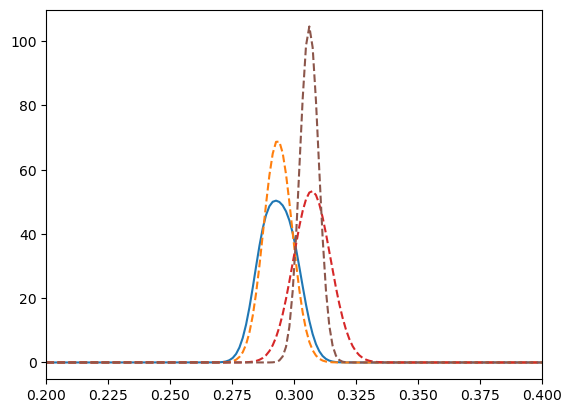

In [116]:
ls = ['-','--',':','-.']
for i, f in enumerate(file_unbinned):
    print(f)
    plt.xlim(0.2, 0.4)
    Omunbinned, y = np.load(f, allow_pickle=True)
    print(np.array(y).shape)
    lnP = np.array([y[i][1] for i in range(len(Omunbinned))])
    #lnPSSC = np.array([y[i][2] for i in range(len(Omunbinned))])
    #Nobs = int(f.split('Nobs=')[1].split('_z')[0])
    #print(Nobs)
    Nth = np.array([y[i][3] for i in range(len(Omunbinned))])
    NNSbb_thth = np.array([y[i][4] for i in range(len(Omunbinned))])
    NNSbb_obsobs = np.array([y[i][5] for i in range(len(Omunbinned))])
    NNSbb_obsth = np.array([y[i][6] for i in range(len(Omunbinned))])
    NSb2_obs = np.array([y[i][7] for i in range(len(Omunbinned))])
    #plt.plot(Omunbinned, NNSbb_thth, 'r', ls = ls[i])
    #plt.plot(Omunbinned, NNSbb_obsobs, 'orange', ls = ls[i])
    #plt.plot(Omunbinned, NNSbb_obsth, 'g', ls = ls[i])
    P1 = np.exp(lnP-np.max(lnP))
    y0 = P1/np.trapz( P1, Omunbinned,)
    #plt.plot(Omunbinned, y0)
    #plt.plot(Omunbinned, y0, '--')
    PSSC1 = np.log(1 + 0.5*(NNSbb_thth - 2*NNSbb_obsth + NNSbb_obsobs)-NSb2_obs)

   # plt.plot(Omunbinned, PSSC1 + 3, ls=ls[i], label='a')
    #plt.ylim(0, 10)
#
#plt.legend()
    lnPSSC2 = lnP + PSSC1
    PSSC2 = np.exp(lnPSSC2-np.min(lnPSSC2))
    y2 =  PSSC2/np.trapz(PSSC2, Omunbinned, )
    plt.plot(Omunbinned, y2)
    plt.plot(Omunbinned, P1/np.trapz(P1, Omunbinned), '--')
    
#plt.plot(Omunbinned, (1 + 0.5*(NNSbb_thth - 2*NNSbb_obsth + NNSbb_obsobs)), ls = ls[i])
#    plt.plot(Omunbinned, (1 + 0.5*(NNSbb_thth**.5 - NNSbb_obsobs**.5)**2), ls = '-.')
#break
    #plt.plot(Omunbinned, NSb2_obs, 'k',ls = ls[i])
#plt.yscale('log')
#plt.ylim(0, 1e3)
   # , NNSbb_thth, NNSbb_obsobs, NNSbb_obsth, NSb2_obs = np.array([y[i][2] for i in range(len(Omunbinned))]))
    #ssc_contOmunbinned = [y[i][2] for i in range(len(Omunbinned))]
    #sn_contOmunbinned = [y[i][1] for i in range(len(Omunbinned))]